<a href="https://colab.research.google.com/github/aishumaithili2007/aiml/blob/main/dctree_in_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
accuracy: 100.0
accuracy: 100.0


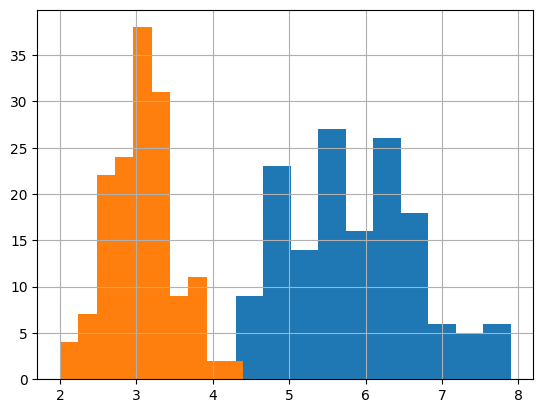

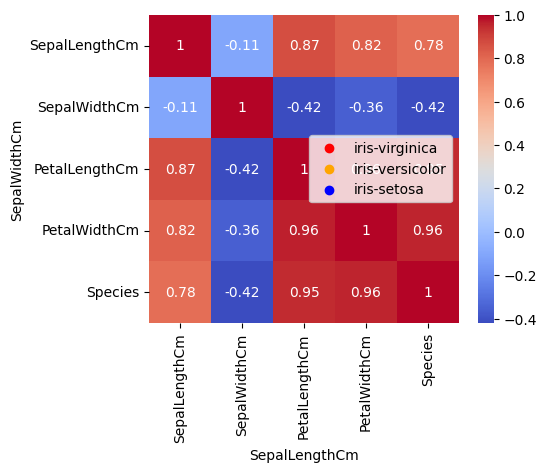

In [24]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv('/content/Iris (7) (1).csv')
df.head()
df.shape
df=df.drop(columns=['Id'])
df.describe()
df.info()
df['Species'].value_counts()
df.isna().sum()
df['SepalLengthCm'].hist()
df['SepalWidthCm'].hist()

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

corr=df.corr()
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

px.scatter(df,x='Species',y='PetalWidthCm')
px.line(df,x='Species',y='PetalWidthCm')
px.scatter(df,x='Species',y='PetalLengthCm')
px.scatter(df,x='Species',y='SepalLengthCm')
px.scatter(df,x='Species',y='SepalWidthCm')
px.scatter_matrix(df,color='Species',title='Iris',dimensions=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])


colors=['red','orange','blue']
Species = ['iris-virginica','iris-versicolor','iris-setosa']

for i in range(3):
  x=df[df['Species']== Species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c=colors[i],label=Species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)
print('accuracy:',model.score(xtest,ytest)*100)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
print('accuracy:',model.score(xtest,ytest)*100)
